In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

trader_df = pd.read_csv("/content/historical_data.csv")
sentiment_df = pd.read_csv("/content/fear_greed_index.csv")

In [7]:
trader_df['date'] = pd.to_datetime(trader_df['Timestamp']).dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date


In [5]:
print(sentiment_df.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [16]:
trader_df['date'] = pd.to_datetime(trader_df['Timestamp'], unit='ms').dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

In [17]:
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='inner')
print("Merged Data Shape:", merged_df.shape)

Merged Data Shape: (184263, 18)


In [18]:
merged_df = merged_df.dropna(subset=['Closed PnL', 'Direction'])
merged_df['win'] = merged_df['Closed PnL'] > 0

In [19]:
print("Avg PnL by Sentiment:\n", merged_df.groupby('classification')['Closed PnL'].mean())
print("\nWin Rate by Sentiment:\n", merged_df.groupby('classification')['win'].mean())
print("\nTop Accounts:\n", merged_df.groupby('Account')['Closed PnL'].sum().sort_values(ascending=False).head(5))

Avg PnL by Sentiment:
 classification
Extreme Greed    25.418772
Fear             50.047622
Greed            87.894859
Neutral          22.229713
Name: Closed PnL, dtype: float64

Win Rate by Sentiment:
 classification
Extreme Greed    0.490089
Fear             0.415146
Greed            0.446471
Neutral          0.317182
Name: win, dtype: float64

Top Accounts:
 Account
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    2.040922e+06
0x083384f897ee0f19899168e3b1bec365f52a9012    1.600230e+06
0xbaaaf6571ab7d571043ff1e313a9609a10637864    9.401572e+05
0xbee1707d6b44d4d52bfe19e41f8a828645437aab    8.111830e+05
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4    6.744040e+05
Name: Closed PnL, dtype: float64


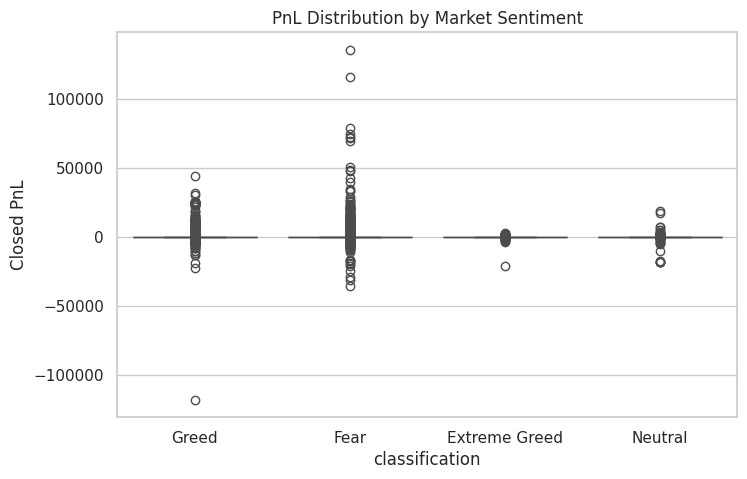

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title("PnL Distribution by Market Sentiment")
plt.show()

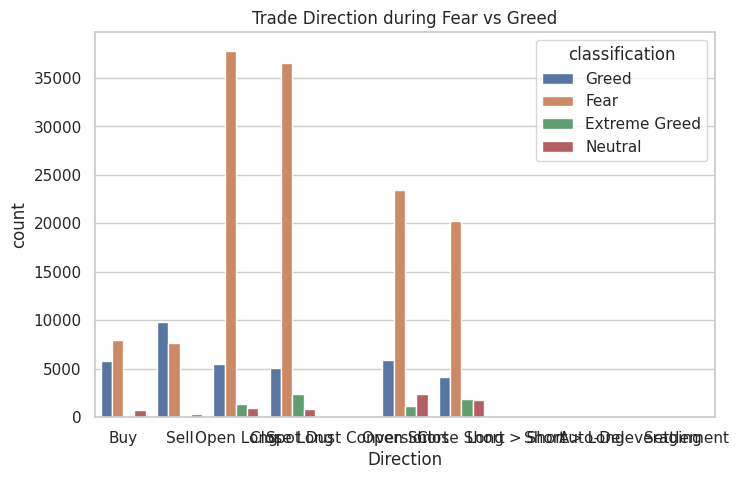

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(data=merged_df, x='Direction', hue='classification')
plt.title("Trade Direction during Fear vs Greed")
plt.show()

In [22]:
volatility = merged_df.groupby(['Coin', 'classification'])['Closed PnL'].std().unstack()
print("\nSymbol-Level PnL Volatility:\n", volatility)


Symbol-Level PnL Volatility:
 classification  Extreme Greed        Fear        Greed    Neutral
Coin                                                             
@1                        NaN   23.389219    54.654374        NaN
@10                       NaN         NaN          NaN   0.031742
@100                      NaN         NaN     9.961659        NaN
@103                      NaN         NaN     5.842904        NaN
@107                      NaN  452.107343  1428.630882        NaN
...                       ...         ...          ...        ...
kBONK              167.657559   39.540013    40.109830   4.002049
kFLOKI                    NaN    2.887789    75.820398        NaN
kNEIRO                    NaN    3.576408          NaN        NaN
kPEPE              223.444209   21.579486    48.485941  24.315078
kSHIB              353.945691   55.260662    24.471884        NaN

[239 rows x 4 columns]
